In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw100m_straight.csv")
df

,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork_straight.networkServer.app[0] ($0=""avg"", #0 - General-0-20230518-18:36:21-53244).9",Unnamed: 19
0,5.540012,-67.469255,7.901536,-81.133830,7.988272,-80.132681,9.015128,-77.320579,9.261757,-93.286603,9.799589,-76.091982,12.588833,-81.078879,18.625567,-94.368564,18.819164,-68.158998,19.544979,-70.948566
1,6.740012,-67.469255,9.101536,-81.133830,9.188272,-80.132681,10.215128,-77.320579,10.461757,-93.286603,10.999589,-76.091982,13.788833,-81.078879,19.825567,-94.368564,20.019164,-68.158998,20.744979,-70.948566
2,17.121603,-72.263708,16.628277,-69.424226,27.063148,-92.566707,25.380488,-73.575882,15.817414,-69.526980,20.613399,-79.382373,19.534157,-76.737139,57.444840,-87.184977,28.380140,-65.587245,32.910065,-73.512178
3,21.141123,-74.773583,20.647797,-72.955268,48.137624,-72.991982,31.821535,-86.497808,19.845089,-87.760713,24.632918,-74.970819,36.737474,-85.047141,89.844470,-85.753179,32.399660,-64.904583,36.929585,-81.363878
4,28.252808,-80.588733,28.567322,-70.942064,86.077862,-81.822620,37.270106,-70.804553,24.019168,-72.641149,36.242830,-78.495697,40.756994,-72.585286,102.191269,-81.282293,37.438790,-68.329269,41.270109,-76.235192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580.089644,-72.185807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7586.557261,-65.765139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7600.409659,-71.704866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7609.575784,-72.402431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_count = pd.read_csv("../results/count_berlin_gw100m_straight.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 0,546
1,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 1,565
2,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 2,586
3,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 3,598
4,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 4,624
5,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 5,644
6,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 6,662
7,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 7,683
8,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 8,706
9,General-0-20230518-18:36:21-53244,0,LoRaNetwork_straight.networkServer.app[0],numReceivedFromNode 9,719


In [39]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [40]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
rssi_values = rssi_values.dropna()
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -67.469255 -81.133830 -80.132681 -77.320579 -93.286603 -76.091982   
1 -67.469255 -81.133830 -80.132681 -77.320579 -93.286603 -76.091982   
2 -72.263708 -69.424226 -92.566707 -73.575882 -69.526980 -79.382373   
3 -74.773583 -72.955268 -72.991982 -86.497808 -87.760713 -74.970819   
4 -80.588733 -70.942064 -81.822620 -70.804553 -72.641149 -78.495697   

       node2      node3      node7      node5  
0 -81.078879 -94.368564 -68.158998 -70.948566  
1 -81.078879 -94.368564 -68.158998 -70.948566  
2 -76.737139 -87.184977 -65.587245 -73.512178  
3 -85.047141 -85.753179 -64.904583 -81.363878  
4 -72.585286 -81.282293 -68.329269 -76.235192  


In [41]:
simtime = df.iloc[:,[i*2 for i in range(10)]]
simtime.set_axis(node_order, axis='columns', inplace=True)
simtime = simtime.dropna()
print(simtime.head())

       node8      node6      node0      node1      node4      node9  \
0   5.540012   7.901536   7.988272   9.015128   9.261757   9.799589   
1   6.740012   9.101536   9.188272  10.215128  10.461757  10.999589   
2  17.121603  16.628277  27.063148  25.380488  15.817414  20.613399   
3  21.141123  20.647797  48.137624  31.821535  19.845089  24.632918   
4  28.252808  28.567322  86.077862  37.270106  24.019168  36.242830   

       node2       node3      node7      node5  
0  12.588833   18.625567  18.819164  19.544979  
1  13.788833   19.825567  20.019164  20.744979  
2  19.534157   57.444840  28.380140  32.910065  
3  36.737474   89.844470  32.399660  36.929585  
4  40.756994  102.191269  37.438790  41.270109  


In [42]:
rssi_values = rssi_values.reset_index()
simtime = simtime.reset_index()
melted_rssi = rssi_values.melt(id_vars=['index'], var_name='node_num', value_name='rssi_value')
melted_simtime = simtime.melt(id_vars=['index'], var_name='node_num', value_name='simtime')
merged = pd.merge(melted_rssi, melted_simtime,  how='left', left_on=['index','node_num'], right_on = ['index','node_num'])
merged.drop(columns=['index'], inplace=True)
merged.sort_values(by=['simtime'], inplace=True)
merged.reset_index(drop=True, inplace=True)
merged = merged[:5100]
merged['simtime'] = merged['simtime'].apply(lambda x: x/10)
merged

,node_num,rssi_value,simtime
0,node8,-67.469255,0.554001
1,node8,-67.469255,0.674001
2,node6,-81.133830,0.790154
3,node0,-80.132681,0.798827
4,node1,-77.320579,0.901513
...,...,...,...
5095,node5,-76.907428,513.686405
5096,node0,-62.405981,513.738239
5097,node9,-75.852543,513.828610
5098,node5,-74.894272,514.088357


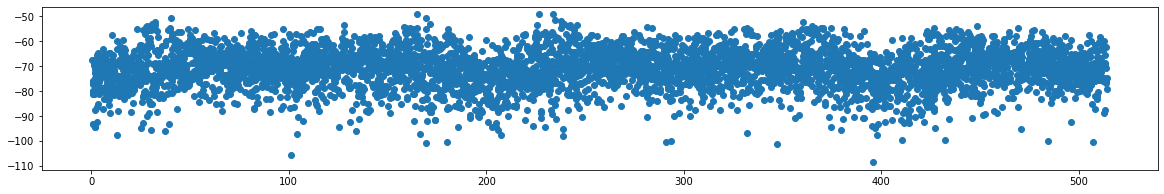

In [43]:
plt.figure(figsize=(20,3), facecolor="white")
plt.scatter(merged["simtime"], merged["rssi_value"])

In [44]:
import numpy as np
import pandas as pd
import pyproj
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np

def process_movement(xml_str, initial_position, speed = 1, angle = 45, time_step = 1):
    root = ET.fromstring(xml_str)
    pos = np.array(initial_position, dtype=float)  # Convert initial_position to float
    direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
    df = pd.DataFrame([{'time': 0, 'x': pos[0], 'y': pos[1], 'z': pos[2]}])
    time = 0  # Initialize time
    
    for child in root:
        if child.tag == 'set':
            speed = float(child.get('speed', speed))
            angle = float(child.get('angle', angle))
            direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
        elif child.tag == 'repeat':
            for i in range(int(child.get('n'))):
                for grandchild in child:
                    if grandchild.tag == 'forward':
                        d = float(grandchild.get('d'))
                        steps = int(d / (speed * time_step))
                        for _ in range(steps):
                            time += time_step  # Update time
                            pos += speed * time_step * direction
                            df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
                    elif grandchild.tag == 'turn':
                        angle += float(grandchild.get('angle'))
                        direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
    return df

xml_str = """
<movement>
    <set speed="1" angle="45"/>
        <repeat n="6">
            <forward d="1000"/>
            <turn angle="180"/>
        </repeat>
</movement>
"""

initial_position = [0, 0, 100] # x, y, z

# Test the function with example parameters
gw_location = process_movement(xml_str, initial_position)
gw_location["time"] = gw_location["time"].apply(lambda x: x/10)
print(gw_location)

def to_gps(x, y, zone, hemisphere):
    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs(f"epsg:326{zone if hemisphere == 'north' else zone + 100}", "epsg:4326")
    
    lat, lon = transformer.transform(x, y)
    return [lat, lon]

zone = int((13.414041 + 180) / 6) + 1
min_x, min_y = 392384.90982960694, 5821806.173358405
gw_x = 652
gw_y = 426
gw_z = 100
gw_location_now = to_gps(gw_x+min_x, gw_y+min_y, zone, 'north')
gw_location_now.append(gw_z)
print(gw_location_now)

/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:

       time             x             y      z
0       0.0  0.000000e+00  0.000000e+00  100.0
1       0.1  7.071068e-01  7.071068e-01  100.0
2       0.2  1.414214e+00  1.414214e+00  100.0
3       0.3  2.121320e+00  2.121320e+00  100.0
4       0.4  2.828427e+00  2.828427e+00  100.0
...     ...           ...           ...    ...
5996  599.6  2.828427e+00  2.828427e+00  100.0
5997  599.7  2.121320e+00  2.121320e+00  100.0
5998  599.8  1.414214e+00  1.414214e+00  100.0
5999  599.9  7.071068e-01  7.071068e-01  100.0
6000  600.0 -7.371881e-14 -7.571721e-14  100.0

[6001 rows x 4 columns]
[52.53965977699919, 13.422832676752234, 100]


/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_26908/3023751280.py:

In [65]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj
from pykalman import KalmanFilter
from tqdm import tqdm

sample_time = 5
update_time = 1

results_3d = []
results_2d = []

estimated_locations_cartesian = []
estimated_locations_cartesian_after_kalman = []
estimated_locations_before_kalman = []
estimation_std = []
estimated_locations = []
answer_locations = []

first_estimation = True

def to_gps_2d(x, y, zone, hemisphere):
    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs(f"epsg:326{zone if hemisphere == 'north' else zone + 100}", "epsg:4326")
    
    lat, lon = transformer.transform(x, y)
    return [lat, lon]

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

def kalman(measurements):
    # Let's say we have some 3D measurements
    # measurements = np.array([[1, 2, 3], [1.1, 1.9, 3.1], [0.9, 2.1, 2.9], ...]) # fill this with your data

    n_timesteps, n_dim = measurements.shape
    n_state = 2 * n_dim

    # We will assume the initial position is the first measurement, and initial velocity is 0
    initial_state_mean = np.zeros(n_state)
    initial_state_mean[:n_dim] = measurements[0]

    # Initial estimation error covariance
    initial_state_covariance = np.eye(n_state)

    # Time step
    dt = 1  # assuming the measurements are 0.1 second apart

    # Transition matrix
    transition_matrix = np.eye(n_state)
    transition_matrix[:n_dim, n_dim:] = dt * np.eye(n_dim)

    # Transition covariance
    transition_covariance = np.eye(n_state)
    transition_covariance[n_dim:, n_dim:] *= 0.01  # assume we're more certain about the velocity than the position

    # Observation matrix
    observation_matrix = np.zeros((n_dim, n_state))
    observation_matrix[:, :n_dim] = np.eye(n_dim)

    # Observation covariance
    observation_covariance = np.eye(n_dim) * 1000

    # Now we can initialize the Kalman Filter
    kf = KalmanFilter(
        initial_state_mean=initial_state_mean,
        initial_state_covariance=initial_state_covariance,
        transition_matrices=transition_matrix,
        transition_covariance=transition_covariance,
        observation_matrices=observation_matrix,
        observation_covariance=observation_covariance,
    )

    # We can use the filter method to apply the Kalman Filter to the measurements
    state_means, state_covariances = kf.filter(measurements)

    # Extract estimated positions and velocities
    positions_estimated = state_means[:, :n_dim]
    velocities_estimated = state_means[:, n_dim:]

    # Extract position and velocity uncertainties
    position_uncertainties = state_covariances[:, :n_dim, :n_dim]
    velocity_uncertainties = state_covariances[:, n_dim:, n_dim:]

    # Extract position and velocity standard deviations
    position_std = np.sqrt(np.diagonal(position_uncertainties, axis1=1, axis2=2))
    velocity_std = np.sqrt(np.diagonal(velocity_uncertainties, axis1=1, axis2=2))

    return positions_estimated, position_std

for i in tqdm(range(int(500/update_time))):
    sample_rssi = merged.loc[(merged['simtime'] >= i*update_time) & (merged['simtime'] <= i*update_time+sample_time)]
    average_rssi = sample_rssi.groupby('node_num')['rssi_value'].mean()
    average_distance = average_rssi.apply(lambda x: 10**((-18.67881 - x) / (10 * 2.04002)))
    average_distance.index = average_distance.index.str.replace('node', '')  # Remove 'node' from the index
    d = average_distance.tolist()

    node_numbers = list(map(int, average_distance.index)) 
    source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
    source_locations = [source_locations[i] for i in node_numbers]

    zone = int((13.414041 + 180) / 6) + 1
    min_x, min_y = 392384.90982960694, 5821806.173358405
    gw_x = gw_location.loc[gw_location["time"]==i*update_time+sample_time]["x"].values[0]
    gw_y = gw_location.loc[gw_location["time"]==i*update_time+sample_time]["y"].values[0]
    gw_z = gw_location.loc[gw_location["time"]==i*update_time+sample_time]["z"].values[0]
    gw_location_now = to_gps_2d(gw_x+min_x, gw_y+min_y, zone, 'north')
    gw_location_now.append(gw_z)
    answer_location = gw_location_now

    errors_array = []

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (*source_locations[d.index(min(d))][:2],100)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, d))
    xyz_receiver_estimated = result.x

    # Store raw results in cartesian coords
    estimated_locations_cartesian.append(xyz_receiver_estimated)
    estimated_locations_before_kalman.append(to_gps(*xyz_receiver_estimated))

    if first_estimation:
        first_estimation = False
        estimation_std.append(0)
    else:
        # Apply kalman filter
        kalman_position, kalman_std = kalman(np.array(estimated_locations_cartesian))
        xyz_receiver_estimated = kalman_position[-1]
        estimation_std.append(kalman_std[-1])

    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    estimated_locations_cartesian_after_kalman.append(xyz_receiver_estimated)
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)


    results_3d.append(np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
    results_2d.append(np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))
    estimated_locations.append([i*update_time+sample_time,receiver_location_estimated])
    answer_locations.append(answer_location)

100%|██████████| 500/500 [01:48<00:00,  4.60it/s]


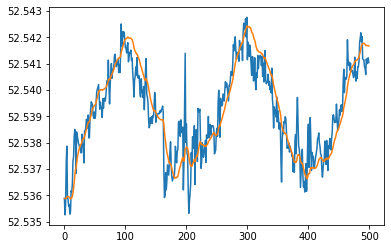

In [66]:
plt.plot([i for i in range(len(estimated_locations_before_kalman))],[i[0] for i in estimated_locations_before_kalman] )
plt.plot([i for i in range(len(estimated_locations))],[i[1][0] for i in estimated_locations] )
plt.show()

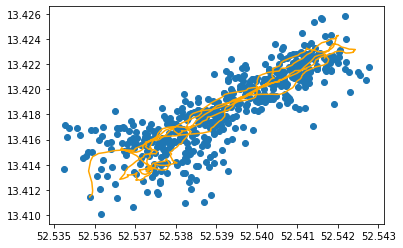

In [67]:
plt.scatter([i[0] for i in estimated_locations_before_kalman],[i[1] for i in estimated_locations_before_kalman] )
plt.plot([i[1][0] for i in estimated_locations],[i[1][1] for i in estimated_locations],c="orange" )
plt.show()

In [68]:
# visualize kalman filter
import folium

estimated_locations_folium = []
estimated_locations_befoer_kalman_folium = []
for i in range(len(estimated_locations)):
    estimated_locations_folium.append(estimated_locations[i][1][:2])
    estimated_locations_befoer_kalman_folium.append(estimated_locations_before_kalman[i][:2])

m = folium.Map(location=estimated_locations[0][1][:2], zoom_start=15, max_zoom=20)
# folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='green', fill=False).add_to(m)
folium.PolyLine(estimated_locations_befoer_kalman_folium, color="purple").add_to(m)
folium.PolyLine(estimated_locations_folium, color="blue").add_to(m)
folium.PolyLine([answer_locations[0][:2],answer_locations[-1][:2]], color="green").add_to(m)

m

In [44]:
estimation_std[0] = np.array([0,0,0])
estimation_std_mean = np.mean(estimation_std,axis=1)

In [78]:

import folium
import time

# Plot the sources and the estimated location of the receiver on a 2D map

# Plot the sources
for i in range(len(estimated_locations)):
    m = folium.Map(location=[52.53962045830213, 13.419884901364885], zoom_start=16, max_zoom=20)

    folium.Marker(location=estimated_locations[i][1][:2], icon=folium.Icon(color='purple')).add_to(m)
    folium.Marker(location=answer_locations[i][:2], icon=folium.Icon(color='green')).add_to(m)

    # folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='red', fill=False).add_to(m)
    # folium.Circle(location=estimated_locations[i][1][:2], radius=estimation_std_mean[i]*3, color='purple', fill=False).add_to(m)
    folium.PolyLine([answer_locations[0][:2],answer_locations[-1][:2]], color="green").add_to(m)

    display(m, clear=True)
    time.sleep(0.5)

In [19]:
import os
import time
from selenium import webdriver
from tqdm import tqdm
# Setup selenium driver
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options)

# Folder to save images
os.makedirs("frames", exist_ok=True)

for i in tqdm(range(len(estimated_locations))):
    m = folium.Map(location=[52.53962045830213, 13.419884901364885], zoom_start=16, max_zoom=20)
    folium.Marker(location=estimated_locations[i][1][:2], icon=folium.Icon(color='purple')).add_to(m)
    folium.Marker(location=answer_locations[i][:2], icon=folium.Icon(color='green')).add_to(m)
    folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='red', fill=False).add_to(m)
    
    # Save map to html
    m.save("map.html")
    
    # Open html file in browser and save screenshot
    driver.get("file:///Users/hiro/LoRaPos/simulation/flora_simulation/scripts/map.html")
    time.sleep(0.1)  # Give the map tiles some time to load
    driver.save_screenshot(f"frames/frame_{i}.png")

driver.quit()


100%|██████████| 500/500 [08:57<00:00,  1.08s/it]


In [20]:
import imageio

images = []
for i in tqdm(range(len(estimated_locations))):
    images.append(imageio.imread(f"frames/frame_{i}.png"))

imageio.mimsave('analysis_berlin_gw100m_moving_huberloss.gif', images, fps=3)

  0%|          | 0/500 [00:00<?, ?it/s]/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_30680/1931477089.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i}.png"))
100%|██████████| 500/500 [01:12<00:00,  6.88it/s]


KeyboardInterrupt: 

In [ ]:
import cv2
import glob

# Get frame file paths
frames = glob.glob('frames/*.png')

# Function to extract numbers from the filename
def extract_number(f):
    s = re.findall("\d+",f)
    return (int(s[0]) if s else -1,f)

frames.sort(key=extract_number)

# Read the first frame to get the height and width
img = cv2.imread(frames[0])
height, width, layers = img.shape

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Be sure to use lower case
out = cv2.VideoWriter('output.mp4', fourcc, 5.0, (width, height))

for frame in tqdm(frames):
    img = cv2.imread(frame)
    out.write(img)  # Write out frame to video

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

100%|██████████| 500/500 [00:36<00:00, 13.62it/s]


In [50]:

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=[52.53962045830213, 13.419884901364885], zoom_start=17, max_zoom=20)

# Plot the sources
for i in range(len(estimated_locations)):
    folium.Marker(location=estimated_locations[i][1][:2], icon=folium.Icon(color='purple')).add_to(m)

for i in range(len(answer_locations)):
    folium.Marker(location=answer_locations[i][:2], icon=folium.Icon(color='green')).add_to(m)
    
folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='red', fill=False).add_to(m)

m

mean eror in 2d 96.44634729317721 m
median eror in 2d 99.3978586400084 m
std in 2d 49.231170368269986


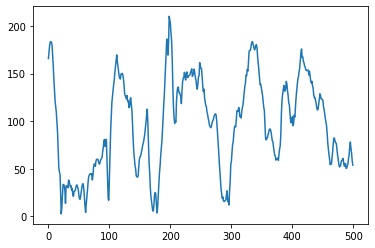

In [75]:
plt.plot(results_2d)
print("mean eror in 2d", np.mean(results_2d), "m")
print("median eror in 2d", np.median(results_2d), "m")
print("std in 2d", np.std(results_2d))

mean eror in 3d 104.95120340957453 m
median eror in 3d 103.72418043738537 m


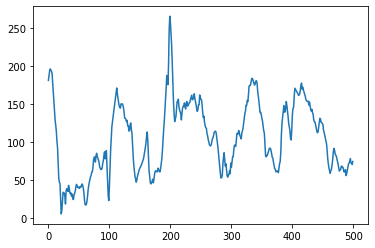

In [70]:
plt.plot(results_3d)
print("mean eror in 3d", np.mean(results_3d), "m")
print("median eror in 3d", np.median(results_3d), "m")

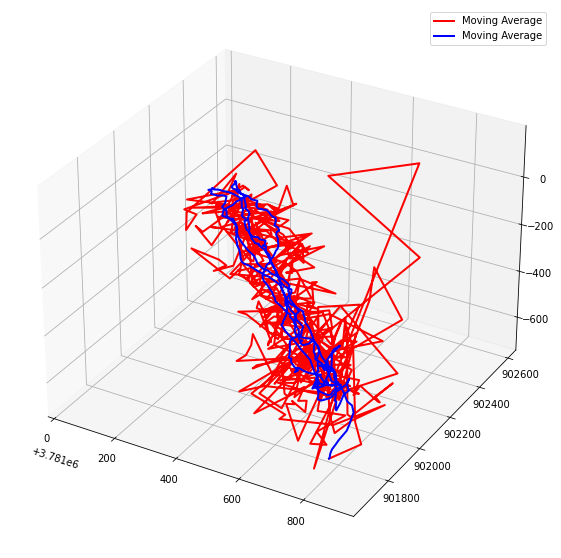

In [77]:
estimated_locations_cartesian_df = pd.DataFrame(estimated_locations_cartesian)
estimated_locations_cartesian_after_kalman_df = pd.DataFrame(estimated_locations_cartesian_after_kalman)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot original data
ax.plot(estimated_locations_cartesian_df[0], estimated_locations_cartesian_df[1], estimated_locations_cartesian_df[2], c='red', linewidth=2, label='Moving Average')
# ax.scatter(estimated_locations_cartesian_df[0], estimated_locations_cartesian_df[1], estimated_locations_cartesian_df[2], s=1, c='red', alpha=0.1, label='Original')

# Plot kalman data
# ax.scatter(estimated_locations_cartesian_after_kalman_df[0], estimated_locations_cartesian_after_kalman_df[1], estimated_locations_cartesian_after_kalman_df[2], s=1, c='blue', alpha=0.1, label='Original')
ax.plot(estimated_locations_cartesian_after_kalman_df[0], estimated_locations_cartesian_after_kalman_df[1], estimated_locations_cartesian_after_kalman_df[2], c='blue', linewidth=2, label='Moving Average')

ax.legend()
plt.show()


In [71]:
estimated_locations_cartesian_df

,0,1,2
0,3.781255e+06,902403.647706,5.039591e+06
1,3.781312e+06,902477.310371,5.039567e+06
2,3.781306e+06,902435.643614,5.039572e+06
3,3.781262e+06,902362.435717,5.039591e+06
4,3.781263e+06,902370.209414,5.039578e+06
...,...,...,...
495,3.781378e+06,902386.428884,5.039570e+06
496,3.781362e+06,902387.577039,5.039561e+06
497,3.781370e+06,902400.834357,5.039564e+06
498,3.781355e+06,902421.342910,5.039578e+06


In [72]:
estimated_locations_before_kalman_df

,0,1,2
0,52.540050,13.422675,18.667216
1,52.539406,13.423538,43.387165
2,52.539543,13.422961,38.092672
3,52.540073,13.422062,16.794451
4,52.539978,13.422169,8.209575
...,...,...,...
495,52.539111,13.422009,72.031543
496,52.539166,13.422079,55.408008
497,52.539108,13.422241,64.823351
498,52.539262,13.422589,69.816508
